In [286]:
 pip install --upgrade jupyterlab-git

Note: you may need to restart the kernel to use updated packages.


In [287]:
pip install kagglehub

Note: you may need to restart the kernel to use updated packages.


In [288]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("spscientist/students-performance-in-exams")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\slrob\.cache\kagglehub\datasets\spscientist\students-performance-in-exams\versions\1


In [289]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
data_file = pd.read_csv(path+"/StudentsPerformance.csv")
data_file

,gender,student number,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,1,group B,bachelor's degree,standard,none,72,72,74
1,female,2,group C,some college,standard,completed,69,90,88
2,female,3,group B,master's degree,standard,none,90,95,93
3,male,4,group A,associate's degree,free/reduced,none,47,57,44
4,male,5,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...,...
995,female,996,group E,master's degree,standard,completed,88,99,95
996,male,997,group C,high school,free/reduced,none,62,55,55
997,female,998,group C,high school,free/reduced,completed,59,71,65
998,female,999,group D,some college,standard,completed,68,78,77


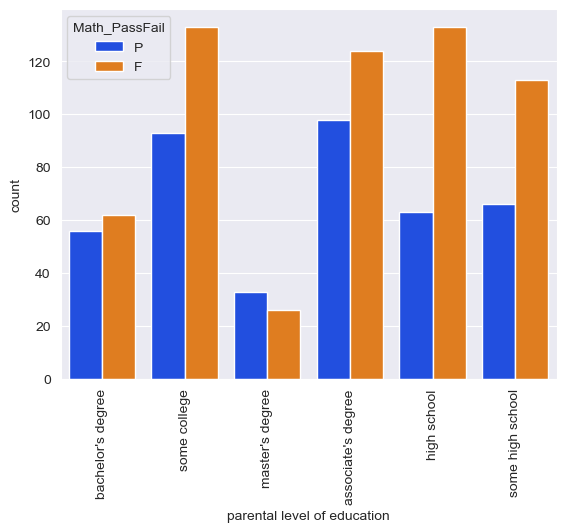

In [291]:
passmark=70
data_file["Math_PassFail"]=np.where(data_file["math score"]<passmark,"F","P")
#We call this column we add "take the math score" for us.
#Let values be False and Positive if greater.
data_file.Math_PassFail.value_counts()

#plot of success in math relative to their parents' education
p=sns.countplot(x="parental level of education",hue="Math_PassFail",data=data_file,palette="bright")
plt.xticks(rotation=90)
plt.show()

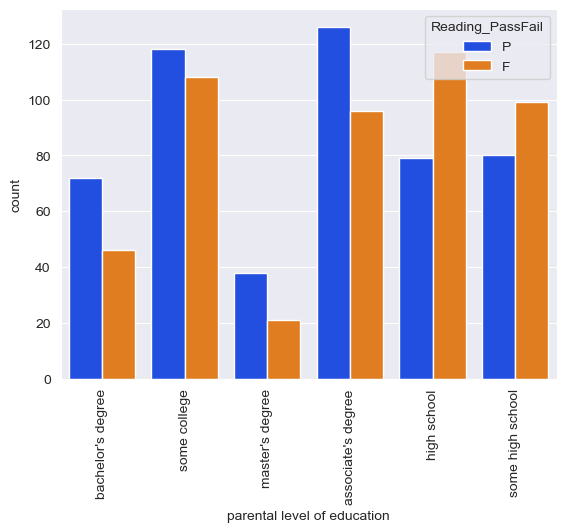

In [296]:
data_file["Reading_PassFail"]=np.where(data_file["reading score"]<passmark,"F","P")
#We call this column we add "take the math score" for us.
#Let values be False and Positive if greater.
data_file.Reading_PassFail.value_counts()

#plot of success in reading relative to their parents' education
p=sns.countplot(x="parental level of education",hue="Reading_PassFail",data=data_file,palette="bright")
plt.xticks(rotation=90)
plt.show()

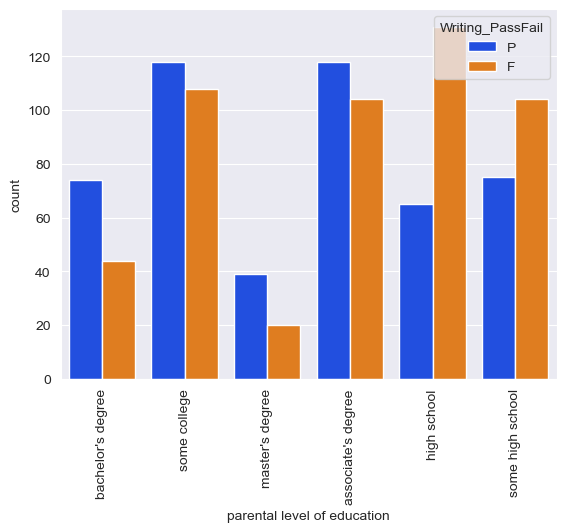

In [298]:
data_file["Writing_PassFail"]=np.where(data_file["writing score"]<passmark,"F","P")
#We call this column we add "take the math score" for us.
#Let values be False and Positive if greater.
data_file.Writing_PassFail.value_counts()

#plot of success in writing relative to their parents' education
p=sns.countplot(x="parental level of education",hue="Writing_PassFail",data=data_file,palette="bright")
plt.xticks(rotation=90)
plt.show()

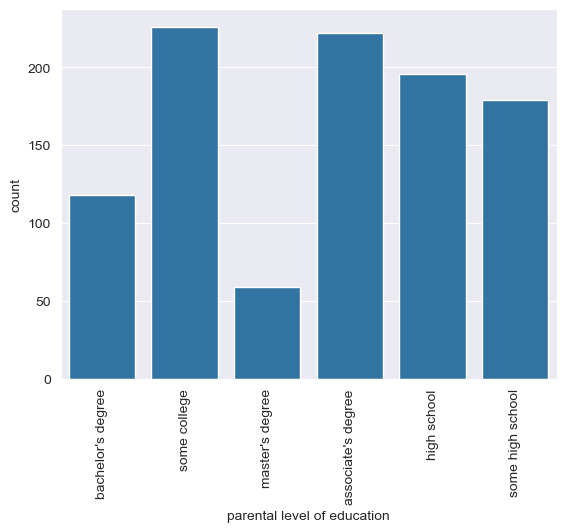

In [300]:
p=sns.countplot(x="parental level of education",data=data_file)
plt.xticks(rotation=90)
plt.show()

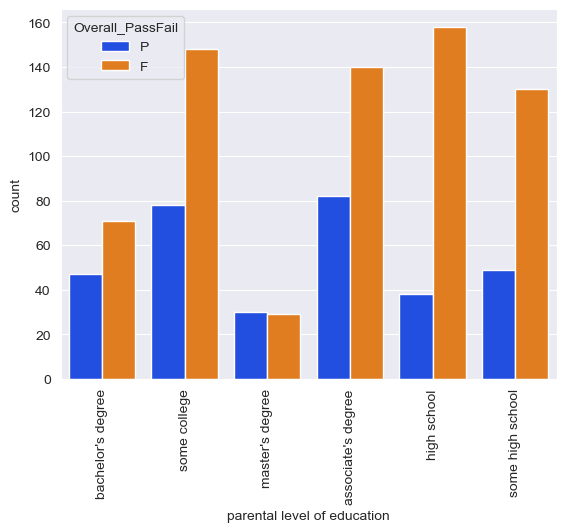

In [302]:
data_file["Overall_PassFail"] = data_file.apply(lambda x: "F" if x["Math_PassFail"]== 'F' 
                                     or x["Reading_PassFail"]== 'F' or x["Writing_PassFail"]== 'F'
                                    else 'P' , axis =1)
p=sns.countplot(x="parental level of education",hue="Overall_PassFail",data=data_file,palette="bright") 
# we compare it to hue
plt.xticks(rotation=90)
plt.show()

In [304]:
data_file.Overall_PassFail.value_counts()

Overall_PassFail
F    676
P    324
Name: count, dtype: int64

In [306]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
target_encoder = preprocessing.TargetEncoder()
data_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   student number               1000 non-null   int64 
 2   race/ethnicity               1000 non-null   object
 3   parental level of education  1000 non-null   object
 4   lunch                        1000 non-null   object
 5   test preparation course      1000 non-null   object
 6   math score                   1000 non-null   int64 
 7   reading score                1000 non-null   int64 
 8   writing score                1000 non-null   int64 
 9   Math_PassFail                1000 non-null   object
 10  Reading_PassFail             1000 non-null   object
 11  Writing_PassFail             1000 non-null   object
 12  Overall_PassFail             1000 non-null   object
dtypes: int64(4), object(9)
memory usag

In [308]:
data_file

,gender,student number,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Math_PassFail,Reading_PassFail,Writing_PassFail,Overall_PassFail
0,female,1,group B,bachelor's degree,standard,none,72,72,74,P,P,P,P
1,female,2,group C,some college,standard,completed,69,90,88,F,P,P,F
2,female,3,group B,master's degree,standard,none,90,95,93,P,P,P,P
3,male,4,group A,associate's degree,free/reduced,none,47,57,44,F,F,F,F
4,male,5,group C,some college,standard,none,76,78,75,P,P,P,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,female,996,group E,master's degree,standard,completed,88,99,95,P,P,P,P
996,male,997,group C,high school,free/reduced,none,62,55,55,F,F,F,F
997,female,998,group C,high school,free/reduced,completed,59,71,65,F,P,F,F
998,female,999,group D,some college,standard,completed,68,78,77,F,P,P,F


In [310]:
for col in categorical_cols:
    print(f'unique set for column {col} is: {data_file[col].unique()}')

unique set for column gender is: ['female' 'male']
unique set for column race/ethnicity is: ['group B' 'group C' 'group A' 'group D' 'group E']
unique set for column parental level of education is: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
unique set for column lunch is: ['standard' 'free/reduced']
unique set for column test preparation course is: ['none' 'completed']
unique set for column Math_PassFail is: ['P' 'F']
unique set for column Reading_PassFail is: ['P' 'F']
unique set for column Writing_PassFail is: ['P' 'F']
unique set for column Overall_PassFail is: ['P' 'F']


In [265]:
CorrelationData=data_file[['math score','reading score','writing score']].corr()
CorrelationData

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


In [326]:
data_file.shape

(1000, 14)

In [354]:
from sklearn.model_selection import train_test_split

X = df_encoded[['gender_male','test preparation course_none','lunch_standard','parental level of education_high school','parental level of education_some college','parental level of education_master\'s degree','parental level of education_some high school','parental level of education_bachelor\'s degree']]
y = df_encoded['math score']
wr_gold = df_encoded['writing score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
Wr_train, Wr_test, wrGold_train, wrGold_test = train_test_split(X, wr_gold, test_size=0.2, random_state=42)
X_train
#y_train

,gender_male,test preparation course_none,lunch_standard,parental level of education_high school,parental level of education_some college,parental level of education_master's degree,parental level of education_some high school,parental level of education_bachelor's degree
29,False,True,True,False,False,True,False,False
535,False,False,False,False,False,False,False,True
695,False,True,False,False,True,False,False,False
557,True,True,False,False,False,True,False,False
836,True,True,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...
106,False,True,True,False,False,True,False,False
270,True,True,True,False,False,False,False,True
860,False,True,True,False,False,False,False,False
435,True,False,False,False,True,False,False,False


In [358]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier  # or any classifier of choice
from sklearn.ensemble import RandomForestRegressor

categorical_features = ['gender_male', 'test preparation course_none', 'lunch_standard']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ])
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])
model.fit(X_train, y_train)

# Evaluate
score = model.score(X_test, y_test)
print(f'Validation Accuracy: {score}')


Validation Accuracy: 0.025


In [360]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define Keras model for regression
model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='tanh'),
    Dense(32, activation='softmax'),
    Dense(1)  # Single output for regression
])

# Compile the model with mean squared error loss for regression
#model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

loss, accuracy = model.evaluate(X_test,y_test)
print(f'Accuracy {accuracy}')

Epoch 1/10
25/25 [==============================] - 2s 17ms/step - loss: 162.1733 - mae: 66.4093 - val_loss: 117.1533 - val_mae: 64.3207
Epoch 2/10
25/25 [==============================] - 0s 5ms/step - loss: 99.2154 - mae: 66.3097 - val_loss: 76.2601 - val_mae: 64.2263
Epoch 3/10
25/25 [==============================] - 0s 6ms/step - loss: 63.5368 - mae: 66.2155 - val_loss: 46.7001 - val_mae: 64.1355
Epoch 4/10
25/25 [==============================] - 0s 6ms/step - loss: 36.1145 - mae: 66.1261 - val_loss: 22.6252 - val_mae: 64.0499
Epoch 5/10
25/25 [==============================] - 0s 5ms/step - loss: 13.0533 - mae: 66.0430 - val_loss: 1.7725 - val_mae: 63.9708
Epoch 6/10
25/25 [==============================] - 0s 5ms/step - loss: -7.5578 - mae: 65.9661 - val_loss: -17.4915 - val_mae: 63.8970
Epoch 7/10
25/25 [==============================] - 0s 5ms/step - loss: -27.5858 - mae: 65.8922 - val_loss: -37.6172 - val_mae: 63.8230
Epoch 8/10
25/25 [==============================] - 0s 5m

In [362]:
# Define Keras model for regression
model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='tanh'),
    Dense(32, activation='softmax'),
    Dense(1)  # Single output for regression
])

# Compile the model with mean squared error loss for regression
#model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['mae'])

# Train the model
history = model.fit(X_train, wrGold_train, validation_data=(X_test, wrGold_test), epochs=10, batch_size=32)

loss, accuracy = model.evaluate(X_test,y_test)
print(f'Accuracy {accuracy}')

Epoch 1/10
25/25 [==============================] - 1s 16ms/step - loss: 131.3792 - mae: 68.3235 - val_loss: 97.2726 - val_mae: 66.2541
Epoch 2/10
25/25 [==============================] - 0s 5ms/step - loss: 78.5497 - mae: 68.2100 - val_loss: 57.2688 - val_mae: 66.1435
Epoch 3/10
25/25 [==============================] - 0s 4ms/step - loss: 41.6948 - mae: 68.0987 - val_loss: 25.4328 - val_mae: 66.0346
Epoch 4/10
25/25 [==============================] - 0s 4ms/step - loss: 12.6913 - mae: 67.9975 - val_loss: 0.7195 - val_mae: 65.9433
Epoch 5/10
25/25 [==============================] - 0s 4ms/step - loss: -10.2023 - mae: 67.9149 - val_loss: -19.9842 - val_mae: 65.8662
Epoch 6/10
25/25 [==============================] - 0s 4ms/step - loss: -31.3731 - mae: 67.8396 - val_loss: -41.7166 - val_mae: 65.7890
Epoch 7/10
25/25 [==============================] - 0s 4ms/step - loss: -56.7094 - mae: 67.7572 - val_loss: -70.1525 - val_mae: 65.6994
Epoch 8/10
25/25 [==============================] - 0s 

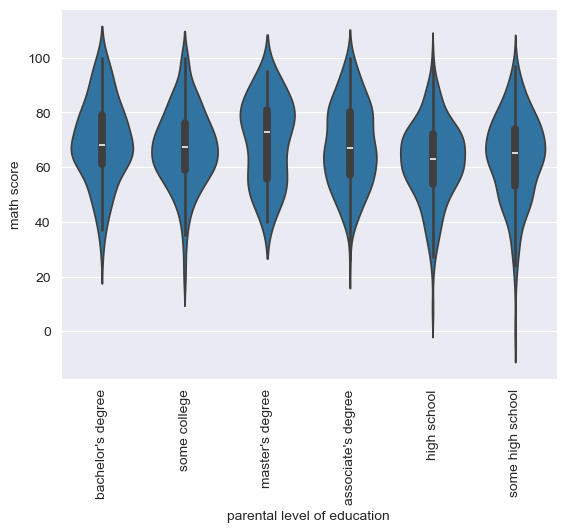

In [364]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.violinplot(x='parental level of education', y='math score', data=data_file)
plt.xticks(rotation=90)
plt.show()

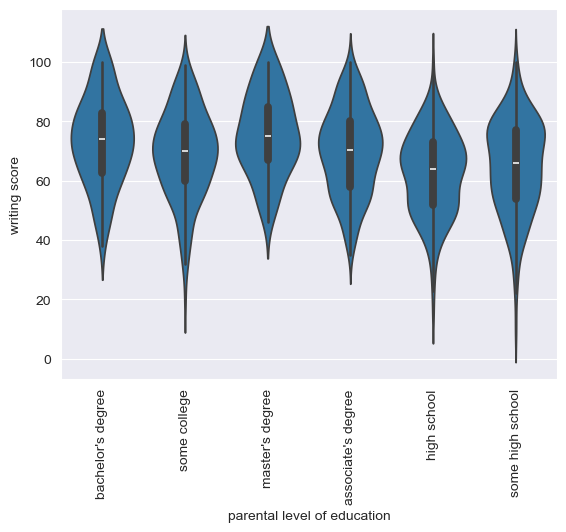

In [240]:
sns.violinplot(x='parental level of education', y='writing score', data=data_file)
plt.xticks(rotation=90)
plt.show()

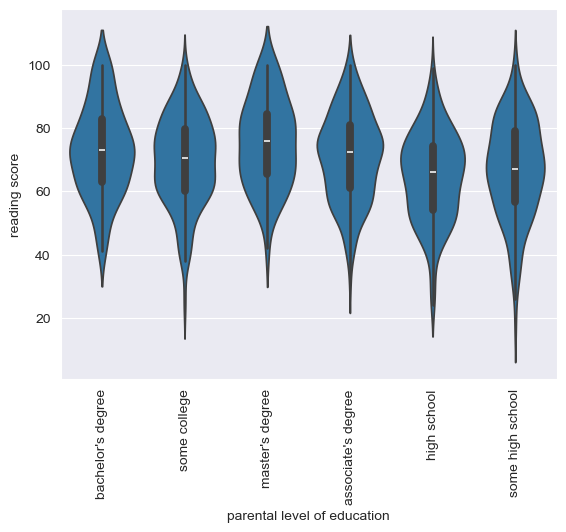

In [242]:
sns.violinplot(x='parental level of education', y='reading score', data=data_file)
plt.xticks(rotation=90)
plt.show()